In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [35]:
# import data
df = pd.read_csv('./data/heart.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [38]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [39]:
df.groupby('target').describe()

age                                                       sex  \
        count       mean       std   min   25%   50%   75%   max  count   
target                                                                    
0       499.0  56.569138  7.908153  35.0  52.0  58.0  62.0  77.0  499.0   
1       526.0  52.408745  9.631804  29.0  44.0  52.0  59.0  76.0  526.0   

                  ...   ca        thal                                     \
            mean  ...  75%  max  count      mean       std  min  25%  50%   
target            ...                                                       
0       0.827655  ...  2.0  4.0  499.0  2.539078  0.685460  0.0  2.0  3.0   
1       0.570342  ...  0.0  4.0  526.0  2.119772  0.468949  0.0  2.0  2.0   

                  
        75%  max  
target            
0       3.0  3.0  
1       2.0  3.0  

[2 rows x 104 columns]

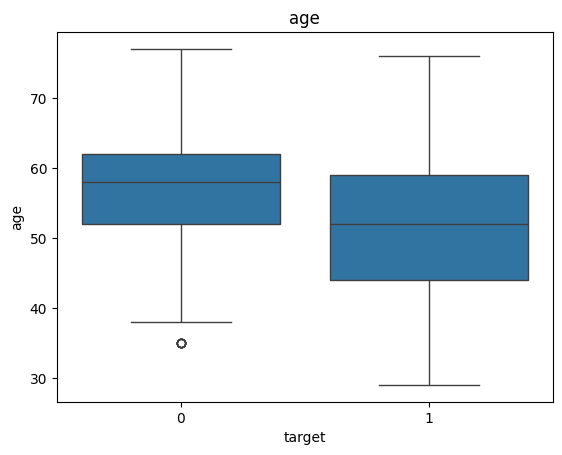

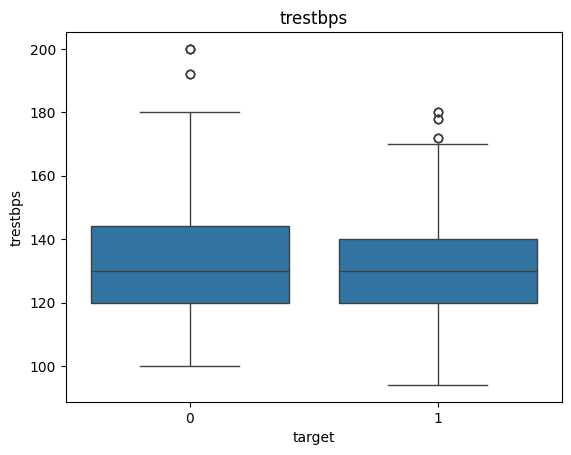

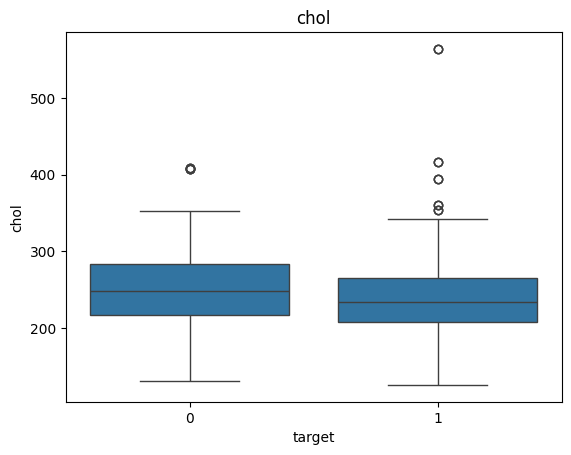

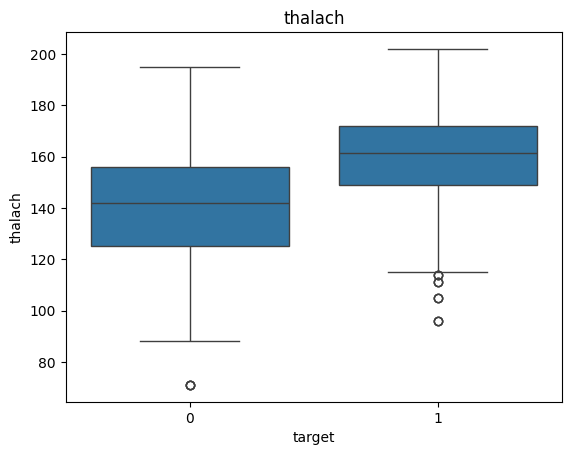

In [40]:
features_to_plot = ['age', 'trestbps', 'chol', 'thalach']

for feature in features_to_plot:
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature}')
    plt.show()

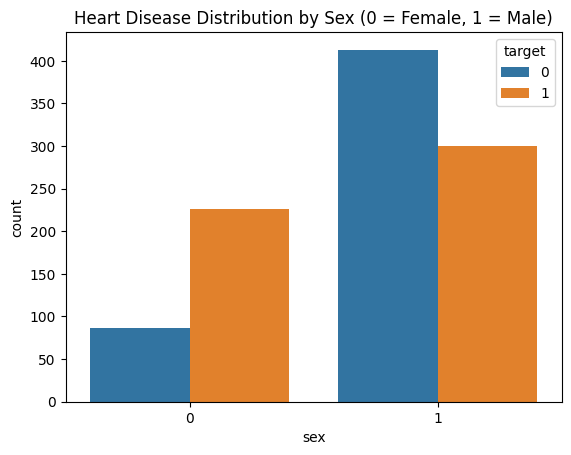

In [41]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Distribution by Sex (0 = Female, 1 = Male)')
plt.show()

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

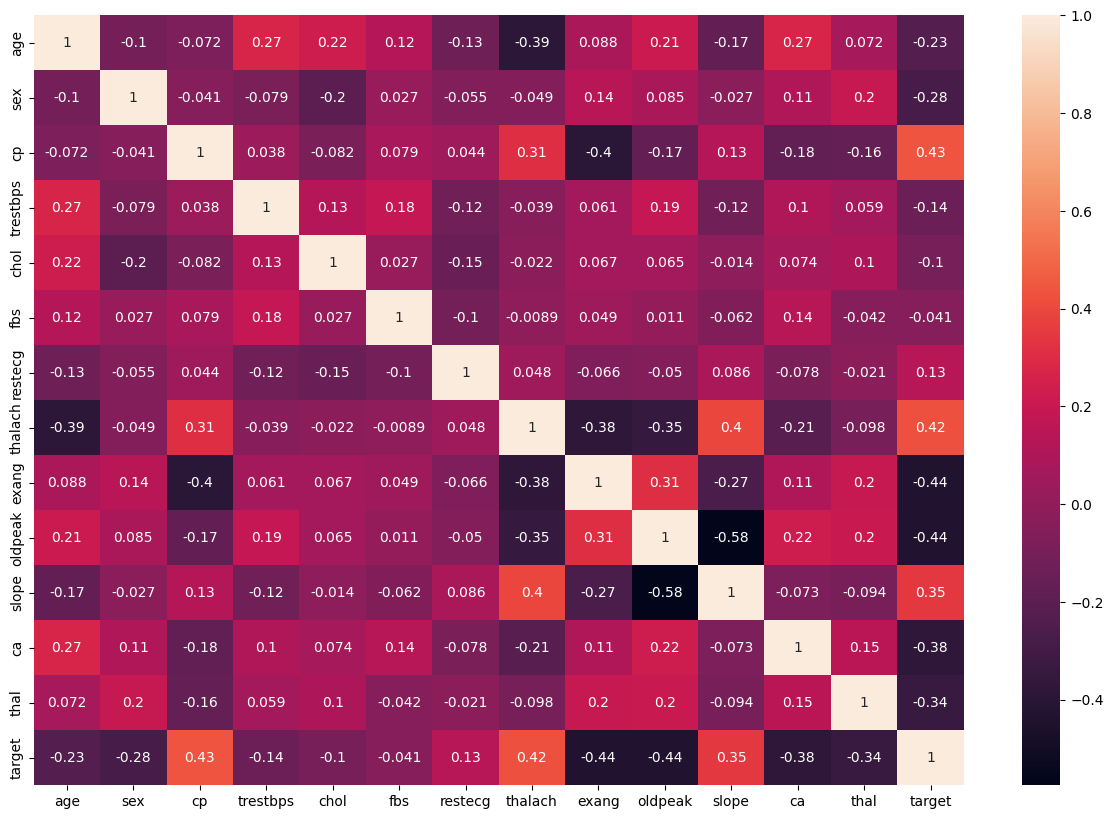

In [42]:
corr_matrix = df.corr()

print(corr_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### EDA Interpretation

Differences in Mean (Grouped Statistics)

Sex: The substantial difference in mean between heart disease groups (target = 0 vs. target = 1) strongly suggests that sex might be a confounder influencing the relationship between other features and heart disease risk.
Boxplots

thalach: The visible upward shift in the boxplot for those with heart disease supports the idea that 'thalach' (maximum heart rate achieved) is associated with heart disease and might also be influenced by other factors related to heart disease risk.
Correlation Matrix

Target Correlations:

The strongest negative correlations with 'target' are 'thalach', 'cp' (chest pain type), and 'age'. This makes sense - we expect lower maximum heart rate, certain chest pain types, and older age to be associated with a higher likelihood of heart disease.
'sex' also has a notable negative correlation with 'target'.
Inter-Feature Correlations:

It's important to look for strong correlations between the features themselves. These could indicate that multiple features are influenced by a common underlying confounder.
Confounder Suspects

Based on this analysis, here's a breakdown of the most promising confounder candidates and why:

Age: Classic heart disease confounder. It has a moderate correlation with 'target' and likely influences other features as well.
Sex: Displays differences in mean values between groups and has a correlation with 'target'. Biological differences between sexes might affect heart disease risk and other health measurements in the dataset.
thalach: This feature seems strongly associated with heart disease but might also be affected by other health factors. Since maximum heart rate can be influenced by fitness level, it's possible that an underlying confounder is distorting its relationship with heart disease.
Additional Thoughts:

Chest Pain Type ('cp'): Its high correlation with 'target' warrants further investigation. It might be a good predictor of heart disease but could also be related to other health conditions that also act as confounders.
Domain Knowledge: Don't underestimate the value of researching medical knowledge about heart disease risk factors. This might illuminate potential confounders that aren't immediately obvious in the statistical analysis.

## Confounder
Based on the EDA we can suspect the features 'age', 'sex', 'talach' to be a possible confounders.

There seems to be some imbalance in sex and age in the dataset, therefore we are choosing to further investigate the effect 'thalach' has under the assumption that it is indeed a confounder. 

'thalach' -> Maximum heart rate achieved
Of course it can affect the possibility of having heart disease, but a lower heart rate is also associated with older age and additionaly a males tend to have a lower heart rate than females.

In [43]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [45]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print(coefficients)

Accuracy: 0.8341463414634146
ROC AUC: 0.8306174957118354
     feature  coefficient
0        age    -0.007776
1        sex    -1.624526
2         cp     0.844882
3   trestbps    -0.015691
4       chol    -0.004725
5        fbs    -0.101739
6    restecg     0.562992
7    thalach     0.019148
8      exang    -0.951234
9    oldpeak    -0.646230
10     slope     0.504240
11        ca    -0.716258
12      thal    -0.766969


In [50]:
# matching
from gower import gower_matrix

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')


def simple_matching_thalach(data):
    # Group by 'thalach' ranges 
    data['thalach_group'] = pd.cut(data['thalach'], bins=[0, 140, 160, 205], labels=[1, 2, 3])  

    matched_pairs = []
    for _, group_data in data.groupby('thalach_group'):
        features_for_distance = ['age', 'sex', 'cp', 'trestbps', 'chol']  # Select features 

        # Temporary conversion for distance calculation
        temp_df = group_data[features_for_distance].copy()
        for col in temp_df.select_dtypes(include='category').columns:
            temp_df[col] = temp_df[col].cat.codes  

        dm = gower_matrix(temp_df)

        # Finding pairs with minimum distances:
        for i in range(len(group_data) - 1):
            min_distance = float('inf')
            match_index = None
            for j in range(i + 1, len(group_data)):
                distance = dm[i, j]
                if distance < min_distance and group_data.iloc[i]['target'] != group_data.iloc[j]['target']: 
                    min_distance = distance
                    match_index = j

            if match_index is not None:
                matched_pair = group_data.iloc[[i, match_index]]
                matched_pairs.append(matched_pair)

    matched_data = pd.concat(matched_pairs)
    return matched_data


matched_data = simple_matching_thalach(df.copy())
matched_data.head()

/var/folders/nx/scf6msw549j5lvz4kv2gfpz00000gn/T/ipykernel_43145/891013090.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group_data in data.groupby('thalach_group'):


UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'